In [1]:
import cv2
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import glob

from camera_calibration import read_calibration, undistort_image
from color_and_gradient import pipeline
from warp_perspective import read_warp, warp_image
from lane_finder import LaneFinder

import sys
sys.path.append('../')
from utils.plot_utils import plt_imlist

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

## Read params

In [2]:
LF = LaneFinder()

images = glob.glob("test_images/**.jpg")

for image in images[-1:]:
    img = mpimg.imread(image)
    LF.process(img)

<Figure size 432x288 with 0 Axes>

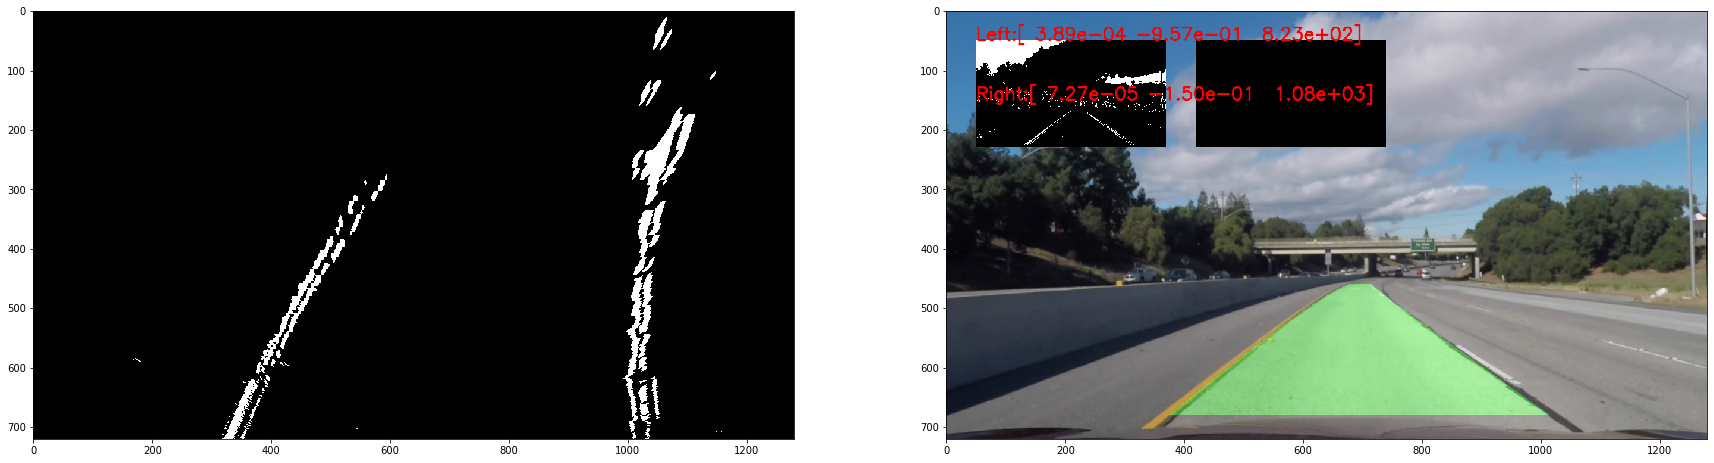

<Figure size 2160x1080 with 0 Axes>

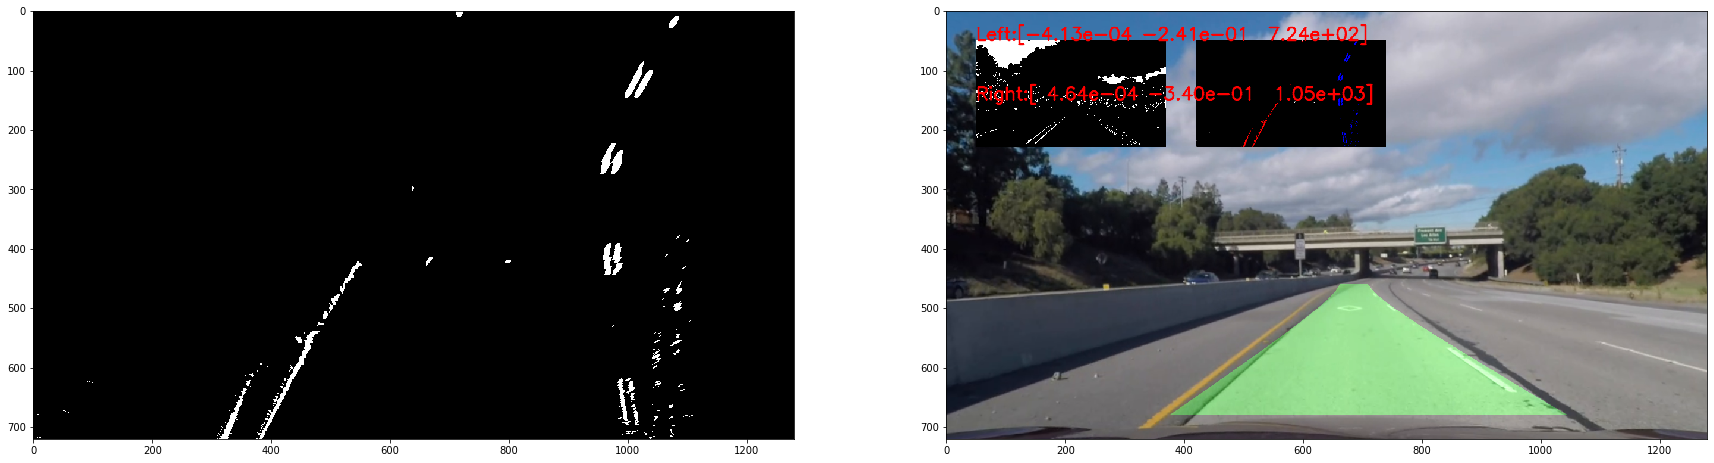

<Figure size 2160x1080 with 0 Axes>

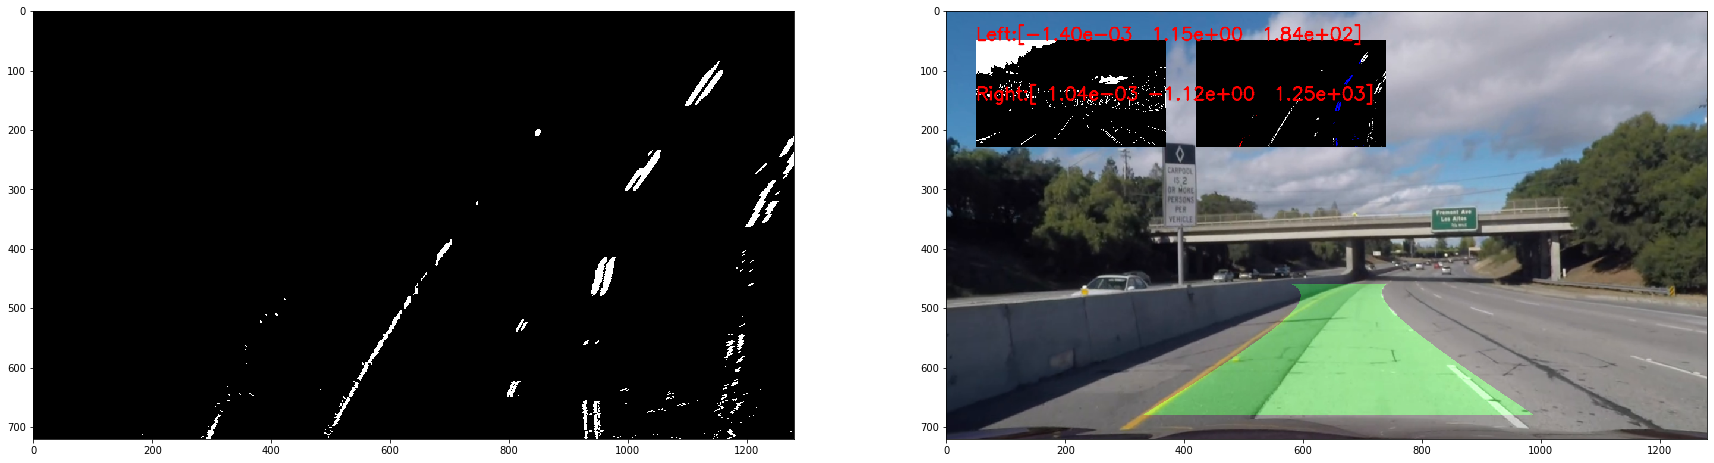

<Figure size 2160x1080 with 0 Axes>

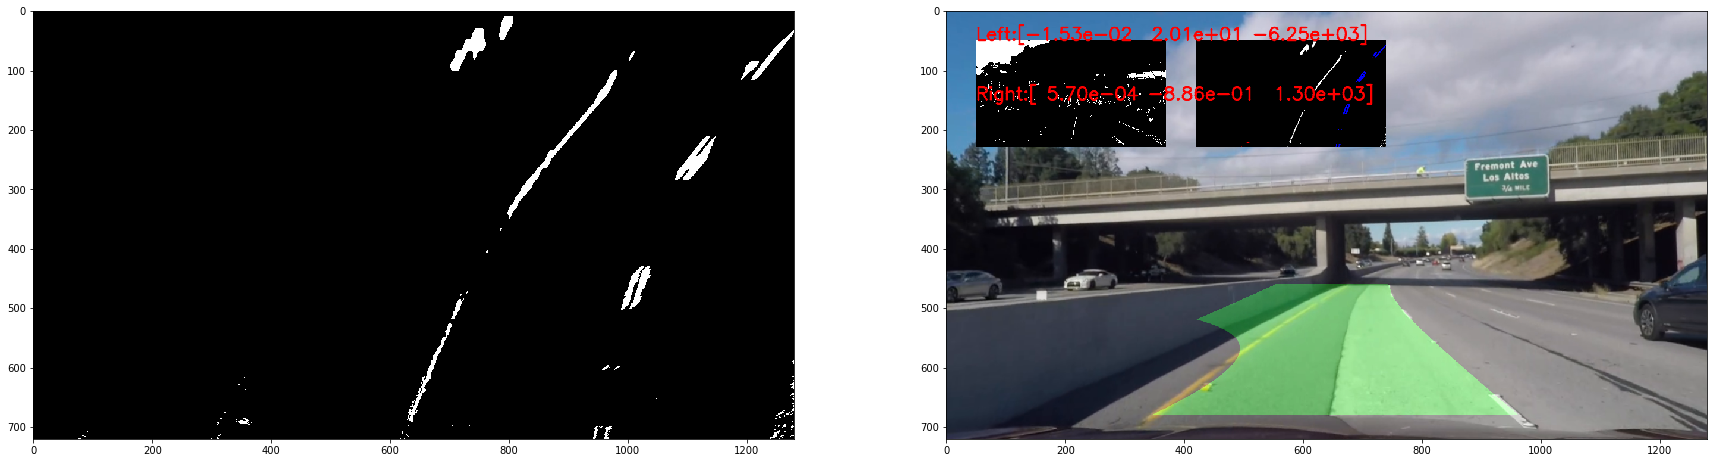

<Figure size 2160x1080 with 0 Axes>

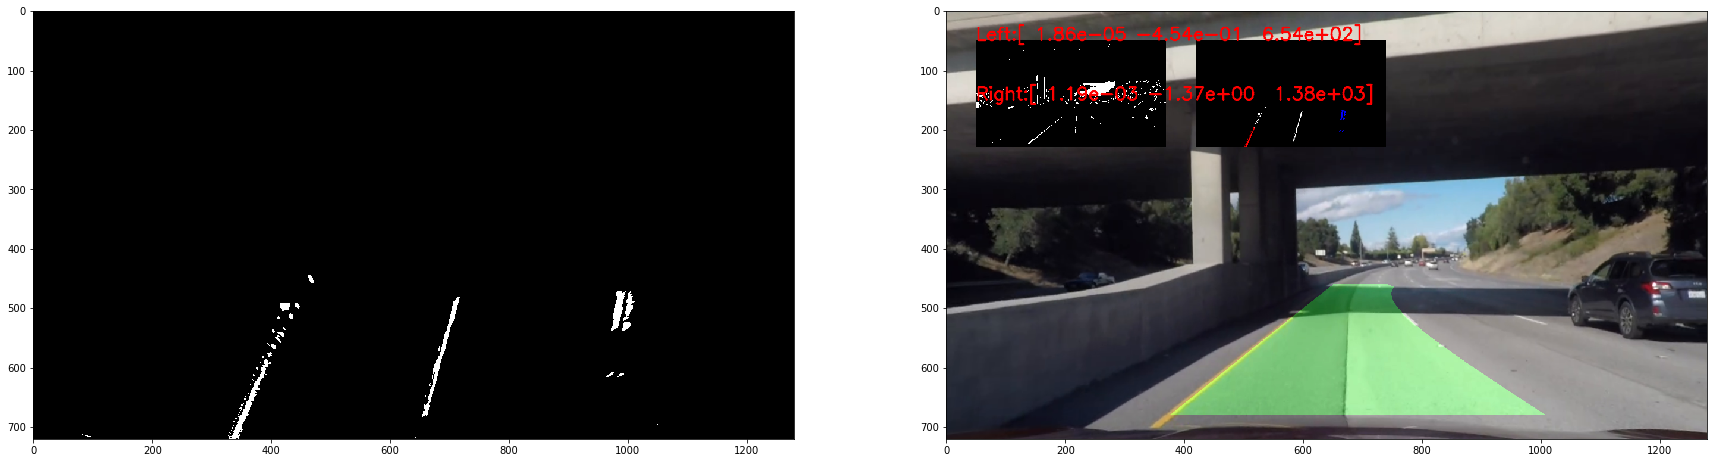

<Figure size 2160x1080 with 0 Axes>

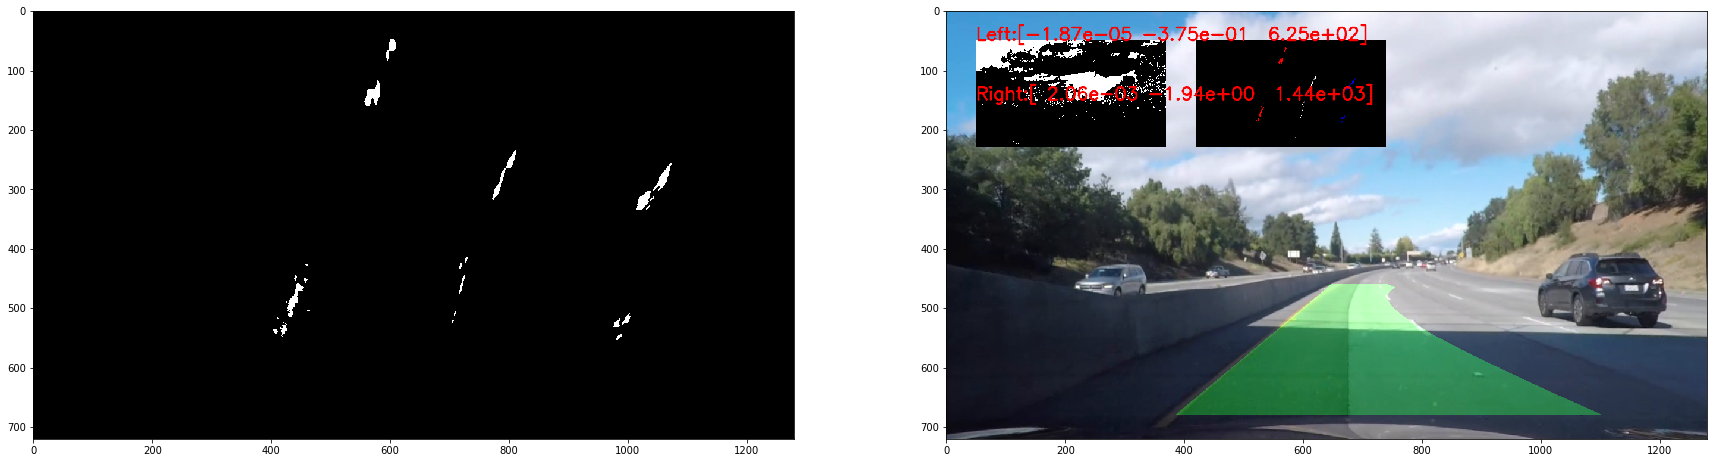

<Figure size 2160x1080 with 0 Axes>

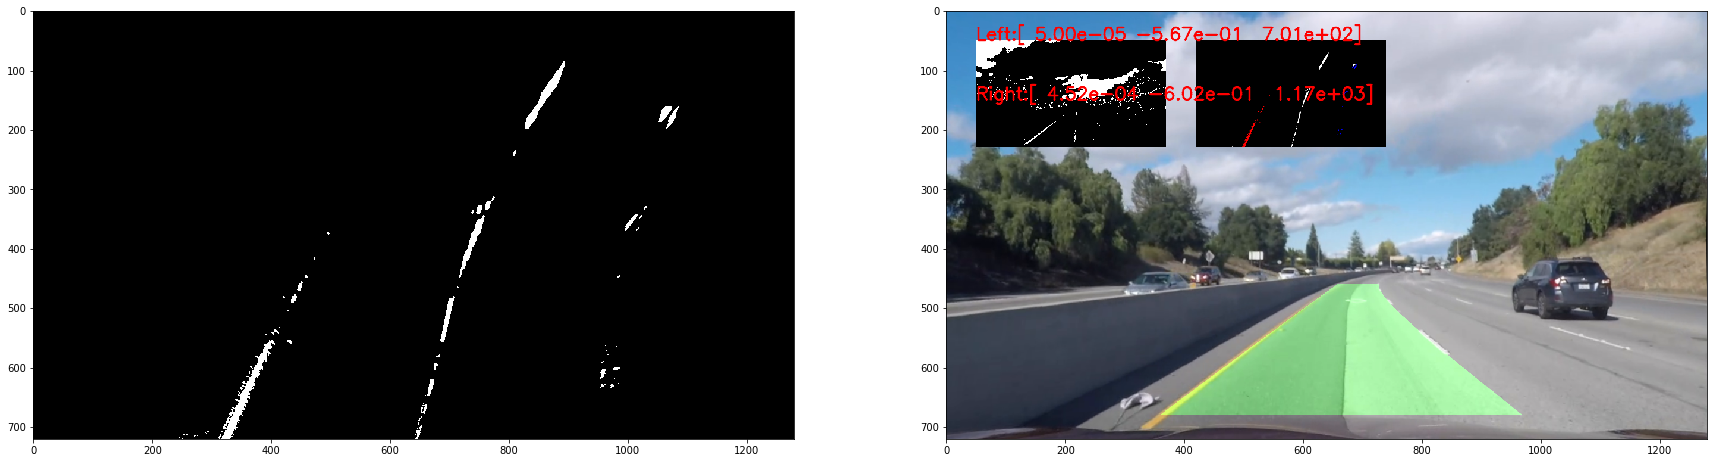

<Figure size 2160x1080 with 0 Axes>

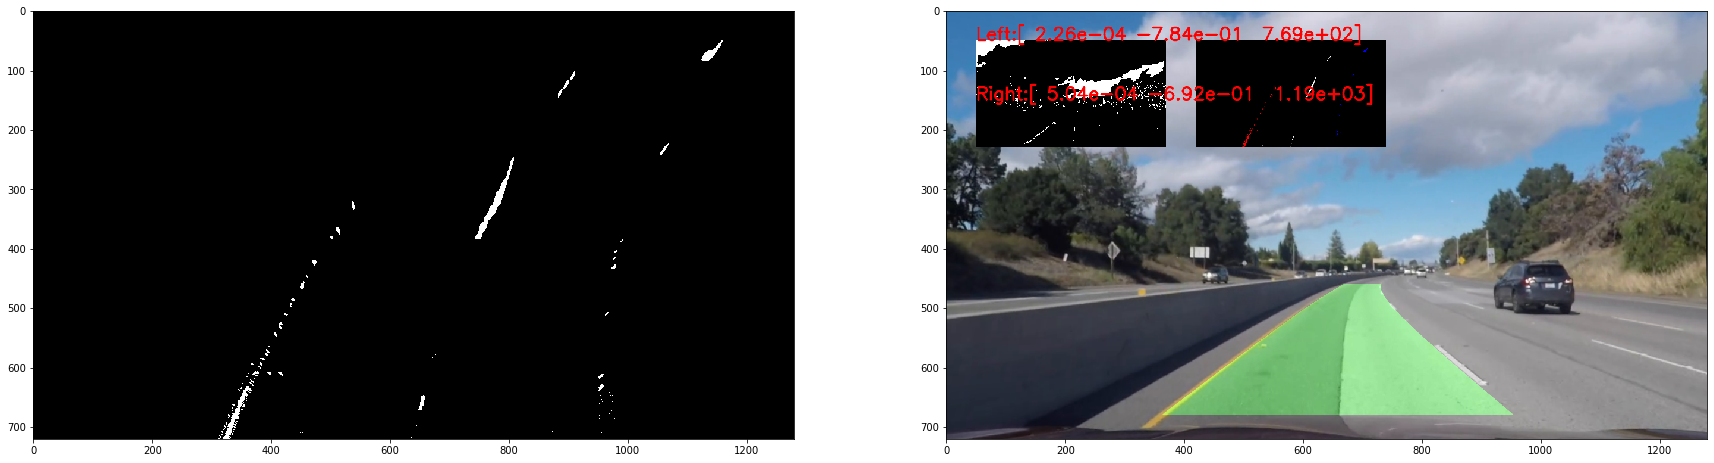

<Figure size 2160x1080 with 0 Axes>

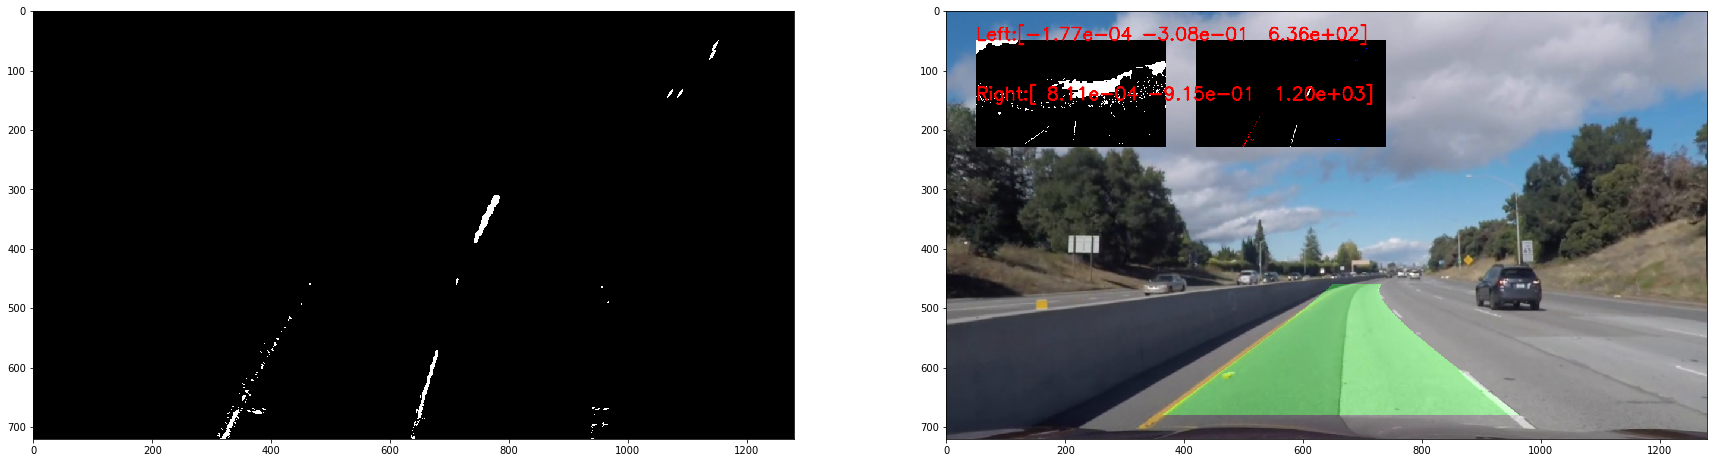

<Figure size 2160x1080 with 0 Axes>

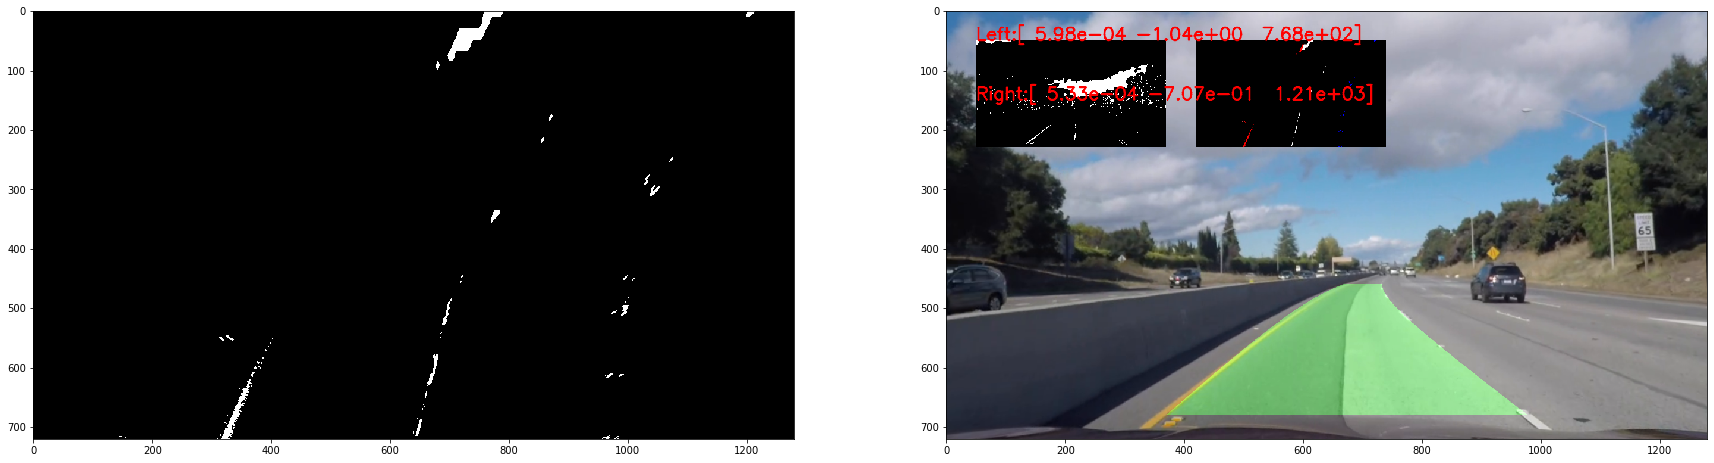

<Figure size 2160x1080 with 0 Axes>

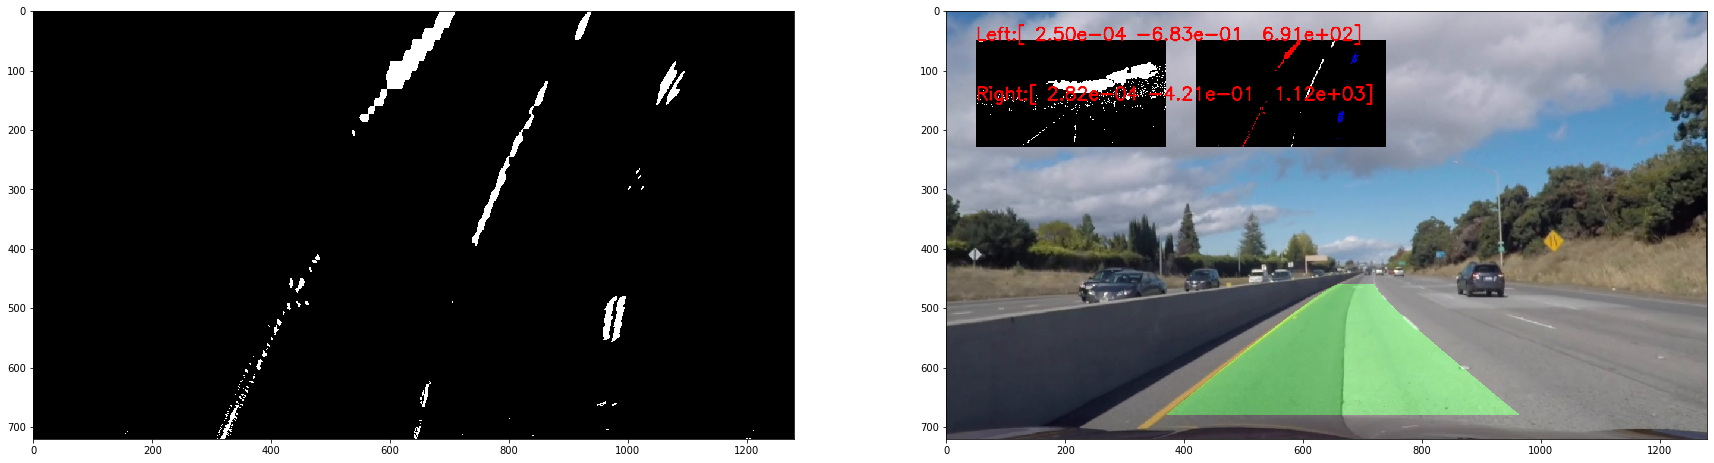

In [3]:
video = VideoFileClip('test_videos/challenge_video.mp4')

LF = LaneFinder()
for i in range(11):
    img = video.get_frame(i)
    img_rect = LF.undistort_image(img)
    img_thresh = LF.threshold_image(img_rect)
    img_warped = LF.warp_image(img_thresh)
    #out_img = LF.fit_polynomial(img_warped, ret_img=True)
    ret = LF.process(img)
    plt_imlist([img_warped, ret])

In [6]:
''''''
LF = LaneFinder()
white_output = 'test_out.mp4'
clip1 = VideoFileClip("test_videos/project_video.mp4")
white_clip = clip1.fl_image(LF.process).subclip(20, 25)
%time white_clip.write_videofile(white_output, audio=False)


t:   2%|▏         | 3/125 [00:00<00:05, 23.19it/s, now=None]

Moviepy - Building video test_out.mp4.
Moviepy - Writing video test_out.mp4



Moviepy - Done !
Moviepy - video ready test_out.mp4
CPU times: user 10.2 s, sys: 1.38 s, total: 11.5 s
Wall time: 8.09 s


In [7]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))